# Pandas III: Data Wrangling
Agenda today:
- Reshaping and Structuring Data
    - __set_index()__
    - __unstack()__
    - __stack()__
    - __pivot()__/__pivot_table__
- Case study and exercises
*some image credit to [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)*

____


## 1. Reshaping DataFrames

### 1.1 Advanced Indexing
- __set_index()__: <br>
Set the index of a dataframes
- __reset_index()__ : <br>
reset_index method will transform our Series into a DataFrame and move the indices into their own column. Generally, you'll always see a groupby statement followed by reset_index

In [1]:
import numpy as np
import pandas as pd

In [7]:
# create some data 
np.random.seed(100)
grades_dict = {"student_names":['Gordon','Chris','Max','Gordon','Mike','Chris','MaryJo','Gordon','Chris','MaryJo'],
         "project":["proj_1","proj_1","proj_1","proj_2","proj_1","proj_2","proj_1","proj_3","proj_3","proj_3"],
         "grades":np.random.randint(80,100,10)}



In [8]:
grades_dict

{'student_names': ['Gordon',
  'Chris',
  'Max',
  'Gordon',
  'Mike',
  'Chris',
  'MaryJo',
  'Gordon',
  'Chris',
  'MaryJo'],
 'project': ['proj_1',
  'proj_1',
  'proj_1',
  'proj_2',
  'proj_1',
  'proj_2',
  'proj_1',
  'proj_3',
  'proj_3',
  'proj_3'],
 'grades': array([88, 83, 87, 95, 96, 90, 82, 82, 82, 94])}

In [9]:
grades = pd.DataFrame(grades_dict)
grades

student_names project  grades
0        Gordon  proj_1      88
1         Chris  proj_1      83
2           Max  proj_1      87
3        Gordon  proj_2      95
4          Mike  proj_1      96
5         Chris  proj_2      90
6        MaryJo  proj_1      82
7        Gordon  proj_3      82
8         Chris  proj_3      82
9        MaryJo  proj_3      94

In [10]:
grades.index

RangeIndex(start=0, stop=10, step=1)

In [11]:
grades.columns

Index(['student_names', 'project', 'grades'], dtype='object')

In [12]:
grades.sort_values(by = 'student_names', inplace = True)
grades

student_names project  grades
1         Chris  proj_1      83
5         Chris  proj_2      90
8         Chris  proj_3      82
0        Gordon  proj_1      88
3        Gordon  proj_2      95
7        Gordon  proj_3      82
6        MaryJo  proj_1      82
9        MaryJo  proj_3      94
2           Max  proj_1      87
4          Mike  proj_1      96

In [15]:
# you can see that even though the student names are sorted, the index are not in order
# use a method that will put the index in order
grades.reset_index(drop = True, inplace = True)

In [16]:
grades

student_names project  grades
0         Chris  proj_1      83
1         Chris  proj_2      90
2         Chris  proj_3      82
3        Gordon  proj_1      88
4        Gordon  proj_2      95
5        Gordon  proj_3      82
6        MaryJo  proj_1      82
7        MaryJo  proj_3      94
8           Max  proj_1      87
9          Mike  proj_1      96

In [17]:
# transform the original grades df into a multilevel indexed dataframe
grades_multi = grades.set_index(['student_names','project'])
grades_multi

grades
student_names project        
Chris         proj_1       83
              proj_2       90
              proj_3       82
Gordon        proj_1       88
              proj_2       95
              proj_3       82
MaryJo        proj_1       82
              proj_3       94
Max           proj_1       87
Mike          proj_1       96

#### Working with multilevel indexed dataframe

In [18]:
# examine the row index and columns of this new df
grades_multi.index

MultiIndex(levels=[['Chris', 'Gordon', 'MaryJo', 'Max', 'Mike'], ['proj_1', 'proj_2', 'proj_3']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 3, 4], [0, 1, 2, 0, 1, 2, 0, 2, 0, 0]],
           names=['student_names', 'project'])

In [19]:
grades_multi.columns

Index(['grades'], dtype='object')

In [20]:
# subsetting from this multilevel df 
# I want all of Chris' grades
grades_multi.loc['Chris',:]

grades
project        
proj_1       83
proj_2       90
proj_3       82

In [22]:
# only want Chris's first grade --> passing the row index as a TUPLE
grades_multi.loc[('Chris','proj_1'),:]

grades    83
Name: (Chris, proj_1), dtype: int64

In [23]:
# want Gordon's first 2 grades 
grades_multi.loc[('Gordon',['proj_1','proj_2']),:]

grades
student_names project        
Gordon        proj_1       88
              proj_2       95

In [27]:
# want all of the grades for project 1 for all students
grades_multi.loc[(slice(None),'proj_1'),:]

# ? Slice(None) syntax research

grades
student_names project        
Chris         proj_1       83
Gordon        proj_1       88
MaryJo        proj_1       82
Max           proj_1       87
Mike          proj_1       96

In [28]:
#Chris' proj_1 grade all the way to MaryJo's proj_1 grades
grades_multi.loc['Chris':'MaryJo']

grades
student_names project        
Chris         proj_1       83
              proj_2       90
              proj_3       82
Gordon        proj_1       88
              proj_2       95
              proj_3       82
MaryJo        proj_1       82
              proj_3       94

In [30]:
# this is equivalent to 
grades_multi.loc[('Chris','proj_1'):('MaryJo','proj_3'),:]

grades
student_names project        
Chris         proj_1       83
              proj_2       90
              proj_3       82
Gordon        proj_1       88
              proj_2       95
              proj_3       82
MaryJo        proj_1       82
              proj_3       94

### 1.2 Reshaping the dataframe - Pivot, stacking and unstacking 
__pivot_table( )__:<br>
Create a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.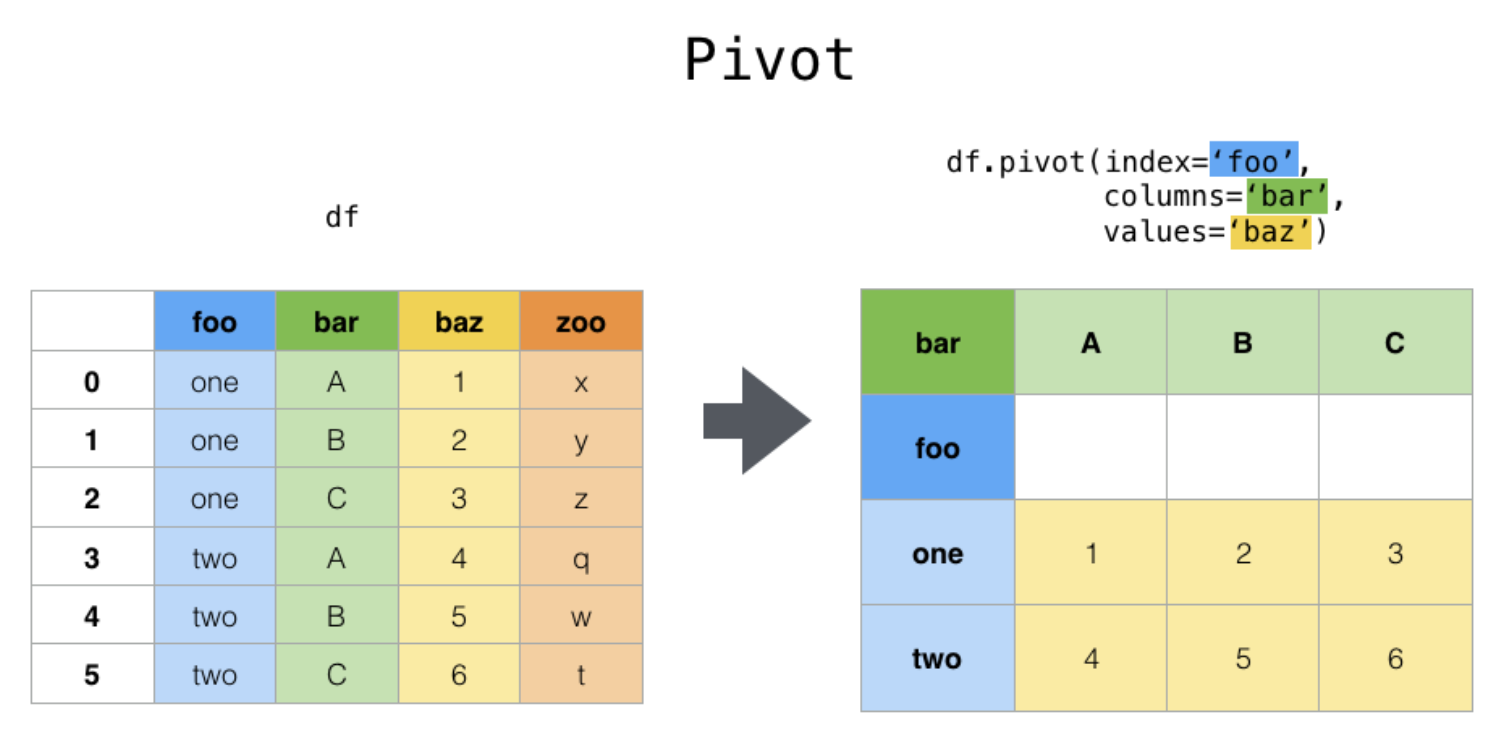

A note on ```pd.pivot()``` and ```pd.pivot_table()```:
- ```pd.pivot``` is able to handle non-numeric data and can't use aggregation
- ```pd.pivot_table``` is able to perform aggregation. A more generalized form of pivot and can handle duplicate entries

In [31]:
# let's go back to the original grades dataset
grades

student_names project  grades
0         Chris  proj_1      83
1         Chris  proj_2      90
2         Chris  proj_3      82
3        Gordon  proj_1      88
4        Gordon  proj_2      95
5        Gordon  proj_3      82
6        MaryJo  proj_1      82
7        MaryJo  proj_3      94
8           Max  proj_1      87
9          Mike  proj_1      96

In [32]:
# what if I want to changes the structure of the dataframe?
grades_pivoted = pd.pivot_table(grades, values='grades', index='student_names', columns='project')
grades_pivoted
# why are there some NaN's here?

project        proj_1  proj_2  proj_3
student_names                        
Chris            83.0    90.0    82.0
Gordon           88.0    95.0    82.0
MaryJo           82.0     NaN    94.0
Max              87.0     NaN     NaN
Mike             96.0     NaN     NaN

In [33]:
grades_pivoted.index

Index(['Chris', 'Gordon', 'MaryJo', 'Max', 'Mike'], dtype='object', name='student_names')

In [34]:
grades_pivoted.columns

Index(['proj_1', 'proj_2', 'proj_3'], dtype='object', name='project')

____
__unstack()__:<br>
Pivot a level of the (necessarily hierarchical) index labels, returning a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels.

If the index is not a MultiIndex, the output will be a Series (the analogue of stack when the columns are not a MultiIndex).

The level involved will automatically get sorted.
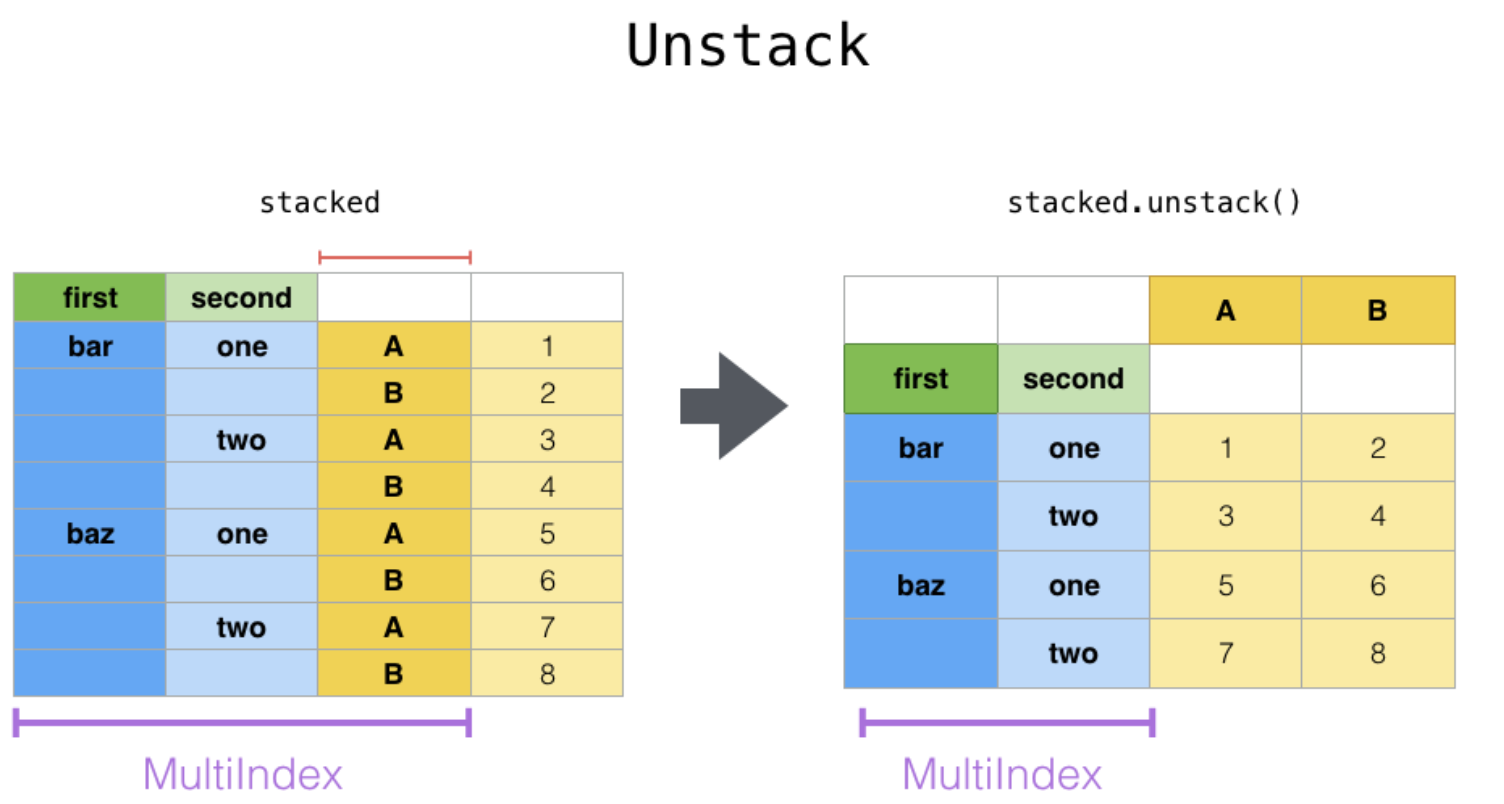

In [35]:
grades

student_names project  grades
0         Chris  proj_1      83
1         Chris  proj_2      90
2         Chris  proj_3      82
3        Gordon  proj_1      88
4        Gordon  proj_2      95
5        Gordon  proj_3      82
6        MaryJo  proj_1      82
7        MaryJo  proj_3      94
8           Max  proj_1      87
9          Mike  proj_1      96

In [36]:
grade_ser = grades.groupby(['student_names','project']).grades.mean()
grade_ser

student_names  project
Chris          proj_1     83
               proj_2     90
               proj_3     82
Gordon         proj_1     88
               proj_2     95
               proj_3     82
MaryJo         proj_1     82
               proj_3     94
Max            proj_1     87
Mike           proj_1     96
Name: grades, dtype: int64

In [37]:
pd.DataFrame(grade_ser)

grades
student_names project        
Chris         proj_1       83
              proj_2       90
              proj_3       82
Gordon        proj_1       88
              proj_2       95
              proj_3       82
MaryJo        proj_1       82
              proj_3       94
Max           proj_1       87
Mike          proj_1       96

In [38]:
grade_ser.unstack()
### this is the same as pivoted table above. In fact, unstacking is a SPECIAL CASE of pivot tables

project        proj_1  proj_2  proj_3
student_names                        
Chris            83.0    90.0    82.0
Gordon           88.0    95.0    82.0
MaryJo           82.0     NaN    94.0
Max              87.0     NaN     NaN
Mike             96.0     NaN     NaN

____
__stack()__:<br> “pivot” a level of the (possibly hierarchical) column labels, returning a DataFrame with an index with a new inner-most level of row labels.
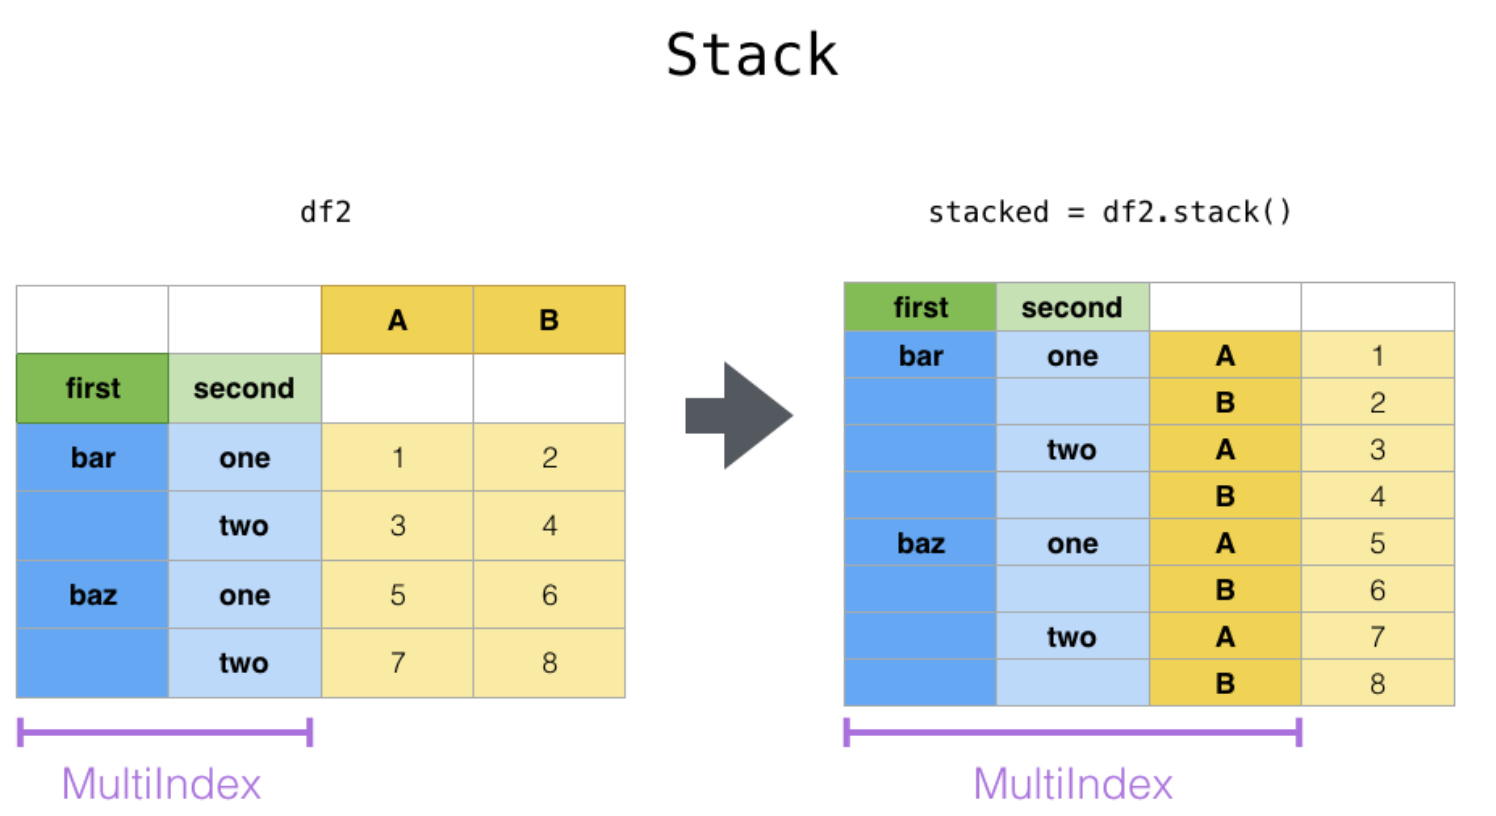

In [39]:
grades

student_names project  grades
0         Chris  proj_1      83
1         Chris  proj_2      90
2         Chris  proj_3      82
3        Gordon  proj_1      88
4        Gordon  proj_2      95
5        Gordon  proj_3      82
6        MaryJo  proj_1      82
7        MaryJo  proj_3      94
8           Max  proj_1      87
9          Mike  proj_1      96

In [40]:
grades_pivoted

project        proj_1  proj_2  proj_3
student_names                        
Chris            83.0    90.0    82.0
Gordon           88.0    95.0    82.0
MaryJo           82.0     NaN    94.0
Max              87.0     NaN     NaN
Mike             96.0     NaN     NaN

In [43]:
# when you stack the dataframe above, you're putting them back in the pd series format they originally were in 
pd.DataFrame(grades_pivoted.stack(), columns = ['grades'])

grades
student_names project        
Chris         proj_1     83.0
              proj_2     90.0
              proj_3     82.0
Gordon        proj_1     88.0
              proj_2     95.0
              proj_3     82.0
MaryJo        proj_1     82.0
              proj_3     94.0
Max           proj_1     87.0
Mike          proj_1     96.0

____
## The Adults Dataset

In [44]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
adults = pd.read_csv(url,header=None)
columns = ['age','work_class','fnlwgt','education','education_num','marital_status','occupation','relationship','race'
           ,'sex','capital_gain','capital_loss','hours_per_week','native_country','income']
adults.columns = columns
adults = adults.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
adults['income_binary'] = adults.income.apply(lambda x: 1 if x == '>50K' else 0)

In [45]:
adults.head(5)

age        work_class  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  \
0          2174             0              40  United-States  <=50K   
1             0             0              13  United-States  <=50K   
2             0             0              40  United-States  <=50K   
3             0             0              40  United-States  <=50K   
4             0             0              40           Cuba  <=50K   

   income_binary  
0              0  
1              0  
2              0  
3              0  
4              0

__Reviews!!__

In [46]:
# review - get a summary statistics of the dataset
adults.describe

<bound method NDFrame.describe of        age        work_class  fnlwgt     education  education_num  \
0       39         State-gov   77516     Bachelors             13   
1       50  Self-emp-not-inc   83311     Bachelors             13   
2       38           Private  215646       HS-grad              9   
3       53           Private  234721          11th              7   
4       28           Private  338409     Bachelors             13   
5       37           Private  284582       Masters             14   
6       49           Private  160187           9th              5   
7       52  Self-emp-not-inc  209642       HS-grad              9   
8       31           Private   45781       Masters             14   
9       42           Private  159449     Bachelors             13   
10      37           Private  280464  Some-college             10   
11      30         State-gov  141297     Bachelors             13   
12      23           Private  122272     Bachelors             13   


In [47]:
# get the correlation matrix of this dataset
adults.corr()

age    fnlwgt  education_num  capital_gain  capital_loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043195      0.000432     -0.010252   
education_num   0.036527 -0.043195       1.000000      0.122630      0.079923   
capital_gain    0.077674  0.000432       0.122630      1.000000     -0.031615   
capital_loss    0.057775 -0.010252       0.079923     -0.031615      1.000000   
hours_per_week  0.068756 -0.018768       0.148123      0.078409      0.054256   
income_binary   0.234037 -0.009463       0.335154      0.223329      0.150526   

                hours_per_week  income_binary  
age                   0.068756       0.234037  
fnlwgt               -0.018768      -0.009463  
education_num         0.148123       0.335154  
capital_gain          0.078409       0.223329  
capital_loss          0.054256       0.150526  
hours_per_week        1.000000       0.229689  
income_binary         0.229689       1.000000

In [51]:
# get the mean values of hours per week worked organized by occupation
adults.groupby(['occupation'])['hours_per_week'].mean().sort_values()

occupation
?                    31.906131
Priv-house-serv      32.885906
Other-service        34.701669
Adm-clerical         37.558355
Handlers-cleaners    37.947445
Tech-support         39.432112
Armed-Forces         40.666667
Machine-op-inspct    40.755744
Sales                40.781096
Craft-repair         42.304221
Prof-specialty       42.386715
Protective-serv      42.870570
Transport-moving     44.656230
Exec-managerial      44.987703
Farming-fishing      46.989940
Name: hours_per_week, dtype: float64

In [53]:
# get the proportion of adults that make more or less than 50K organized by race
groupedby_race = adults.groupby('race').income_binary.value_counts()
groupedby_race

race                income_binary
Amer-Indian-Eskimo  0                  275
                    1                   36
Asian-Pac-Islander  0                  763
                    1                  276
Black               0                 2737
                    1                  387
Other               0                  246
                    1                   25
White               0                20699
                    1                 7117
Name: income_binary, dtype: int64

In [54]:
# what if we want a more legible format - such that the values of adults counts, organized by their race, 
# are in one column if they make more than 50k and in another column otherwise
groupedby_race.unstack()

income_binary           0     1
race                           
Amer-Indian-Eskimo    275    36
Asian-Pac-Islander    763   276
Black                2737   387
Other                 246    25
White               20699  7117

In [55]:
# grouping by race 
grouped_by_race = adults.groupby(['race']).income_binary.value_counts().unstack()
grouped_by_race
# allows us to calculate the proportion of people who earned more than 50k by race

income_binary           0     1
race                           
Amer-Indian-Eskimo    275    36
Asian-Pac-Islander    763   276
Black                2737   387
Other                 246    25
White               20699  7117

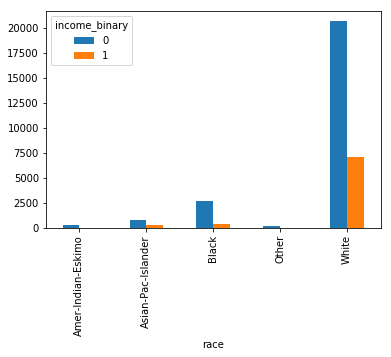

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
grouped_by_race.plot(kind = 'bar', stacked = False)
plt.show()

In [62]:
# calculating proportion
grouped_by_race['total'] = adults.groupby(['race']).income_binary.count()
grouped_by_race['percentage'] = grouped_by_race[1]/grouped_by_race.total
grouped_by_race

income_binary           0     1  total  percentage
race                                              
Amer-Indian-Eskimo    275    36    311    0.115756
Asian-Pac-Islander    763   276   1039    0.265640
Black                2737   387   3124    0.123880
Other                 246    25    271    0.092251
White               20699  7117  27816    0.255860

In [63]:
# organize the adults dataset by race and sex
# grouped_by_race_and_sex
adults.set_index('race','sex')

age        work_class  fnlwgt     education  \
race                                                              
White                39         State-gov   77516     Bachelors   
White                50  Self-emp-not-inc   83311     Bachelors   
White                38           Private  215646       HS-grad   
Black                53           Private  234721          11th   
Black                28           Private  338409     Bachelors   
White                37           Private  284582       Masters   
Black                49           Private  160187           9th   
White                52  Self-emp-not-inc  209642       HS-grad   
White                31           Private   45781       Masters   
White                42           Private  159449     Bachelors   
Black                37           Private  280464  Some-college   
Asian-Pac-Islander   30         State-gov  141297     Bachelors   
White                23           Private  122272     Bachelors   
Black                32           Private  205019    Assoc-acdm   
Asian-Pac-Islander   40           Private  121772     Assoc-voc   
Amer-Indian-Eskimo   34           Private  245487       7th-8th   
White                25  Self-emp-not-inc  176756       HS-grad   
White                32           Private  186824       HS-grad   
White                38           Private   28887          11th   
White                43  Self-emp-not-inc  292175       Masters   
White                40           Private  193524     Doctorate   
Black                54           Private  302146       HS-grad   
Black                35       Federal-gov   76845           9th   
White                43           Private  117037          11th   
White                59           Private  109015       HS-grad   
White                56         Local-gov  216851     Bachelors   
White                19           Private  168294       HS-grad   
Asian-Pac-Islander   54                 ?  180211  Some-college   
White                39           Private  367260       HS-grad   
White                49           Private  193366       HS-grad   
...                 ...               ...     ...           ...   
Asian-Pac-Islander   30                 ?   33811     Bachelors   
White                34           Private  204461     Doctorate   
Asian-Pac-Islander   54           Private  337992     Bachelors   
White                37           Private  179137  Some-college   
Black                22           Private  325033          12th   
White                34           Private  160216     Bachelors   
Black                30           Private  345898       HS-grad   
Black                38           Private  139180     Bachelors   
White                71                 ?  287372     Doctorate   
White                45         State-gov  252208       HS-grad   
Black                41                 ?  202822       HS-grad   
White                72                 ?  129912       HS-grad   
White                45         Local-gov  119199    Assoc-acdm   
Other                31           Private  199655       Masters   
White                39         Local-gov  111499    Assoc-acdm   
White                37           Private  198216    Assoc-acdm   
White                43           Private  260761       HS-grad   
White                65  Self-emp-not-inc   99359   Prof-school   
White                43         State-gov  255835  Some-college   
White                43  Self-emp-not-inc   27242  Some-college   
Amer-Indian-Eskimo   32           Private   34066          10th   
White                43           Private   84661     Assoc-voc   
Asian-Pac-Islander   32           Private  116138       Masters   
White                53           Private  321865       Masters   
White                22           Private  310152  Some-college   
White                27           Private  257302    Assoc-acdm   
White                40           Private  154374       HS-grad   


In [65]:
adults.groupby(['race', 'sex']).income_binary.value_counts().unstack()

income_binary                  0     1
race               sex                
Amer-Indian-Eskimo Female    107    12
                   Male      168    24
Asian-Pac-Islander Female    303    43
                   Male      460   233
Black              Female   1465    90
                   Male     1272   297
Other              Female    103     6
                   Male      143    19
White              Female   7614  1028
                   Male    13085  6089

In [67]:
# what would happen if we unstack this?
help(adults.count())

Help on Series in module pandas.core.series object:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, dict, or scalar value
 |      Contains data stored in Series
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, argument order is maintained for Python 3.6
 |         and lat

In [71]:
# what if I want to unstack sex?
adults.groupby(['race', 'sex']).income_binary.value_counts().unstack(level='sex')

sex                               Female   Male
race               income_binary               
Amer-Indian-Eskimo 0                 107    168
                   1                  12     24
Asian-Pac-Islander 0                 303    460
                   1                  43    233
Black              0                1465   1272
                   1                  90    297
Other              0                 103    143
                   1                   6     19
White              0                7614  13085
                   1                1028   6089